<a href="https://colab.research.google.com/github/PavanPratapagiri/topic_modeling/blob/main/algorithms/NMF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install wordcloud

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/nytimes_news_articles.csv")

In [ ]:
data

,date,news_category,headline,content,url
0,2016-06-30,sports-baseball,Washington Nationals Max Scherzer Baffles Mets...,WASHINGTON — Stellar pitching kept the Mets af...,http://www.nytimes.com/2016/06/30/sports/baseb...
1,2016-06-30,nyregion,Mayor De Blasios Counsel To Leave Next Month T...,Mayor Bill de Blasio’s counsel and chief legal...,http://www.nytimes.com/2016/06/30/nyregion/may...
2,2016-06-30,nyregion,Three Men Charged In Killing Of Cuomo Administ...,In the early morning hours of Labor Day last y...,http://www.nytimes.com/2016/06/30/nyregion/thr...
3,2016-06-30,nyregion,Tekserve Precursor To The Apple Store To Close...,It was the Apple Store in New York City before...,http://www.nytimes.com/2016/06/30/nyregion/tek...
4,2016-06-30,sports-olympics,Once At Michael Phelpss Feet And Still Chasing...,OMAHA — The United States Olympic swimming tri...,http://www.nytimes.com/2016/06/30/sports/olymp...
...,...,...,...,...,...
8882,2016-04-18,nyregion,Man Killed In Police Shooting In Queens Author...,New York City officers shot and killed a 32-ye...,http://www.nytimes.com/2016/04/18/nyregion/man...
8883,2016-04-18,us-politics,Battle For Senate,There is a second critical contest in America’...,http://www.nytimes.com/2016/04/18/us/politics/...
8884,2016-04-18,nyregion,He Said His Car Had Been Stolen The Police Say...,"On April 1, police officers from the 108th Pre...",http://www.nytimes.com/2016/04/18/nyregion/he-...
8885,2016-04-18,world-asia,Farmers In Arid India Share Camps With Their C...,"KHILAD, India — The cattle camp, on a dusty ba...",http://www.nytimes.com/2016/04/18/world/asia/f...


In [ ]:
data['content']

0       WASHINGTON — Stellar pitching kept the Mets af...
1       Mayor Bill de Blasio’s counsel and chief legal...
2       In the early morning hours of Labor Day last y...
3       It was the Apple Store in New York City before...
4       OMAHA — The United States Olympic swimming tri...
                              ...                        
8882    New York City officers shot and killed a 32-ye...
8883    There is a second critical contest in America’...
8884    On April 1, police officers from the 108th Pre...
8885    KHILAD, India — The cattle camp, on a dusty ba...
8886    The director J.J. Abrams dropped a possible hi...
Name: content, Length: 8887, dtype: object

In [ ]:
data.dropna(subset=['content'], inplace=True)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data['content'])


In [ ]:
tfidf

<8883x57012 sparse matrix of type '<class 'numpy.float64'>'
	with 2519644 stored elements in Compressed Sparse Row format>

In [ ]:
num_topics = 10
nmf_model = NMF(n_components=num_topics, random_state=5)
nmf_model.fit(tfidf)

NMF(n_components=10, random_state=5)

In [ ]:
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

n_top_words = 10  # Number of top words for each topic
feature_names = tfidf_vectorizer.get_feature_names_out()
display_topics(nmf_model, feature_names, n_top_words)


Topic 1:
mr said police state court government officials law people case
Topic 2:
trump mr republican campaign party republicans cruz donald said presidential
Topic 3:
game warriors curry team games points season cavaliers players series
Topic 4:
percent company companies billion rose stock million investors cents fell
Topic 5:
said ms like new people art just mr work time
Topic 6:
clinton mrs sanders democratic campaign voters obama hillary primary senator
Topic 7:
european britain union europe british vote brexit bloc referendum leave
Topic 8:
article nytimes misstated com 556 698 mailed 212 incorrectly 844
Topic 9:
yankees mets inning game season innings collins run runs hit
Topic 10:
graduated bride groom university father york dr mother married school


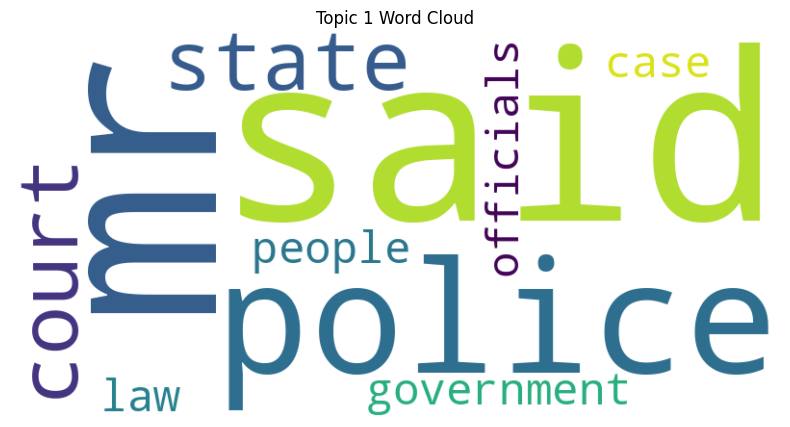

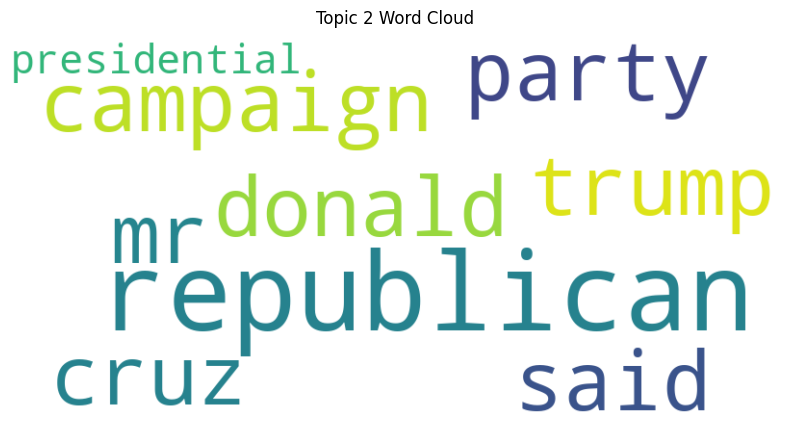

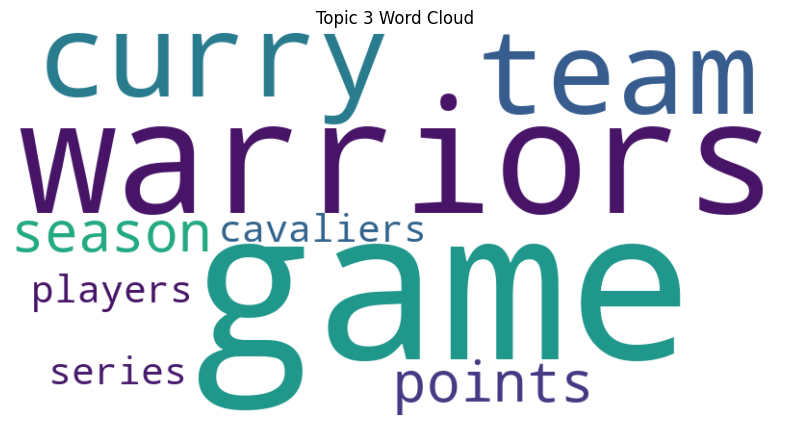

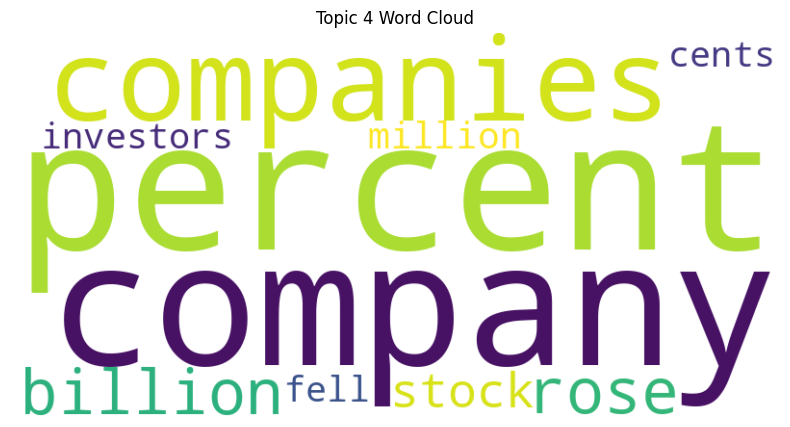

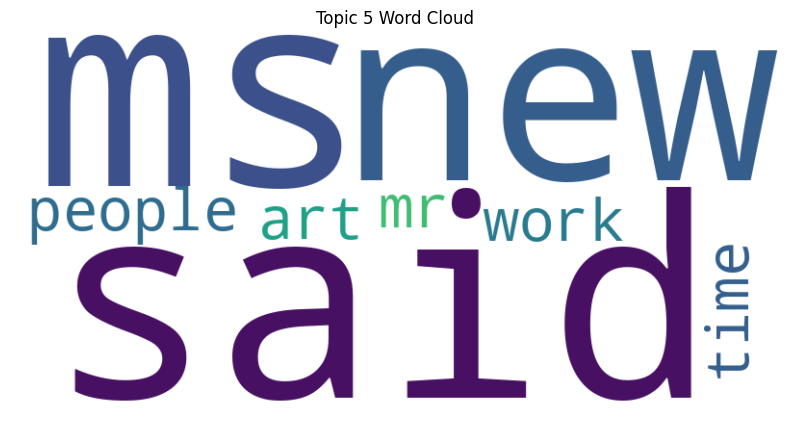

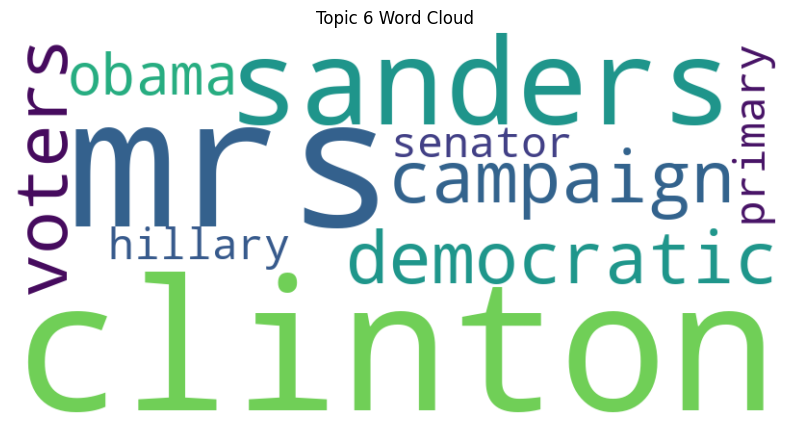

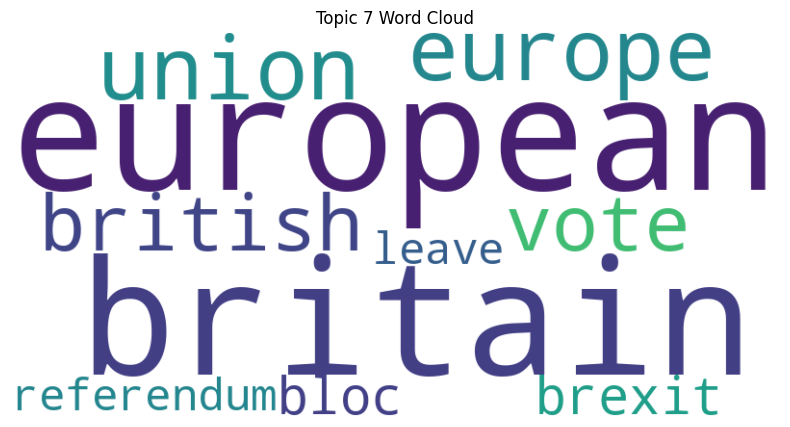

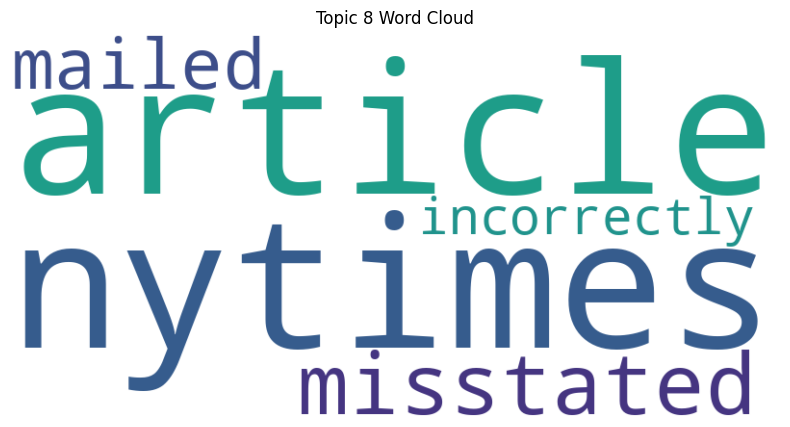

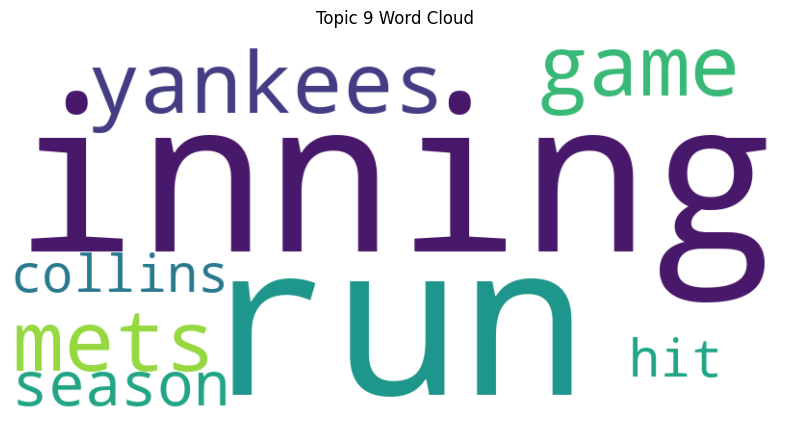

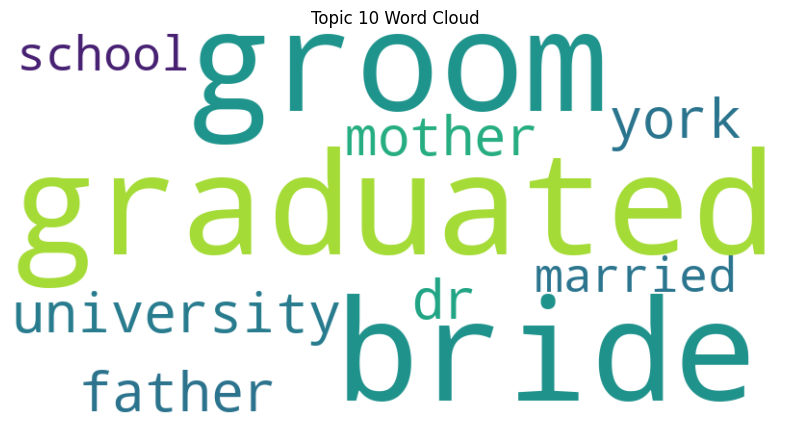

In [ ]:
def generate_wordcloud_for_topic(topic_idx, model, feature_names, n_top_words):
    topic_words = [feature_names[i] for i in model.components_[topic_idx].argsort()[:-n_top_words - 1:-1]]
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(topic_words))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_idx + 1} Word Cloud")
    plt.axis('off')
    plt.show()


n_top_words = 10

for topic_idx in range(num_topics):
    generate_wordcloud_for_topic(topic_idx, nmf_model, feature_names, n_top_words)


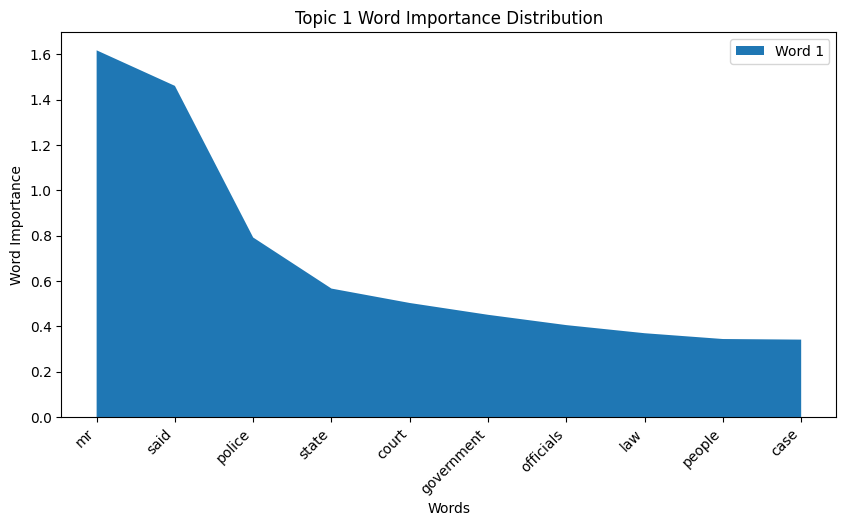

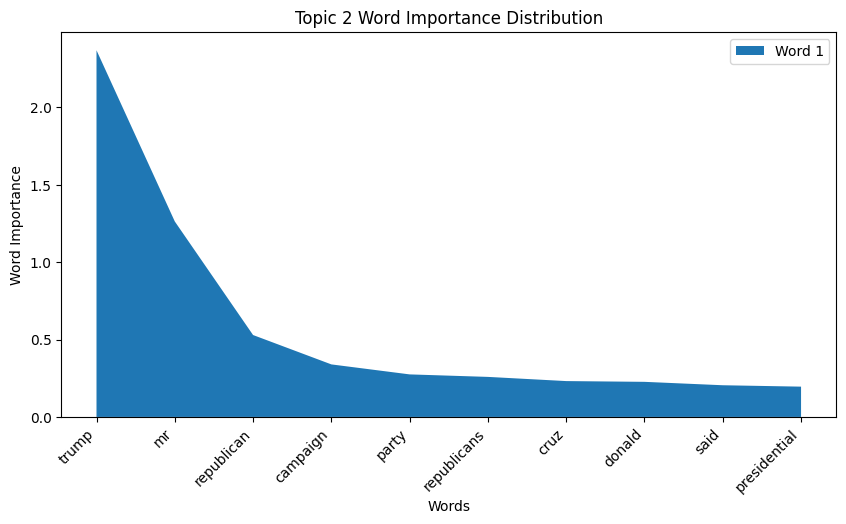

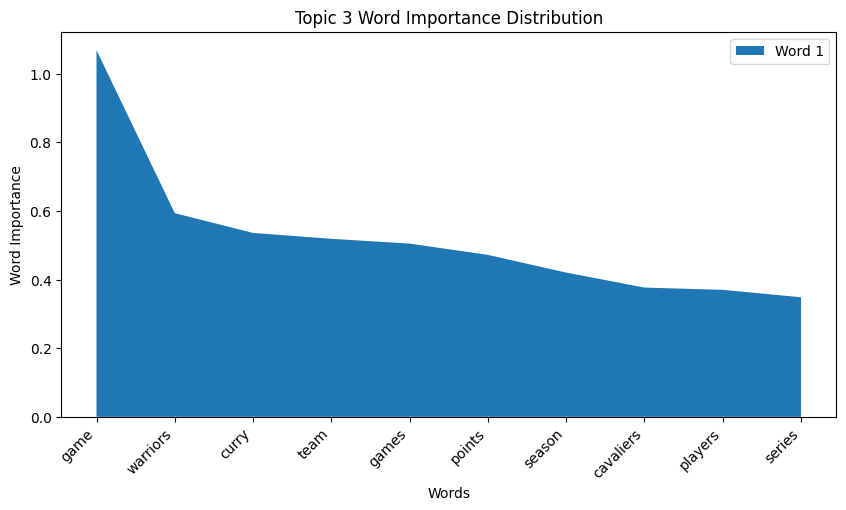

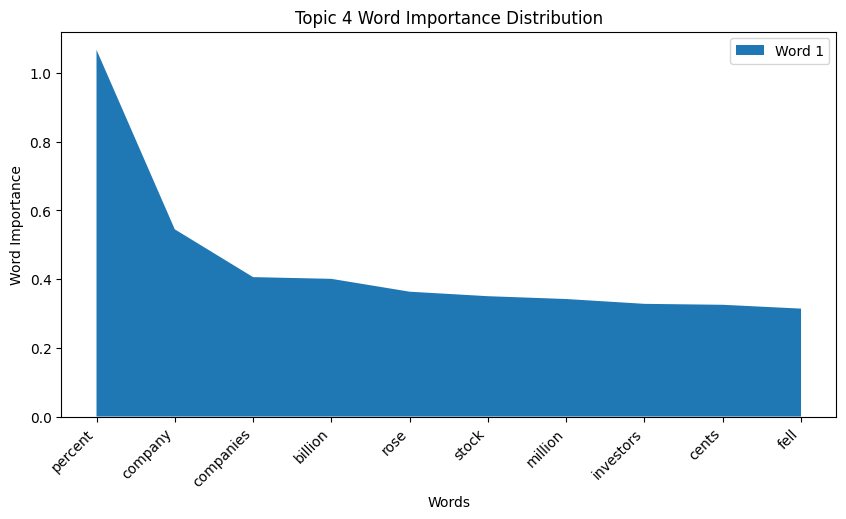

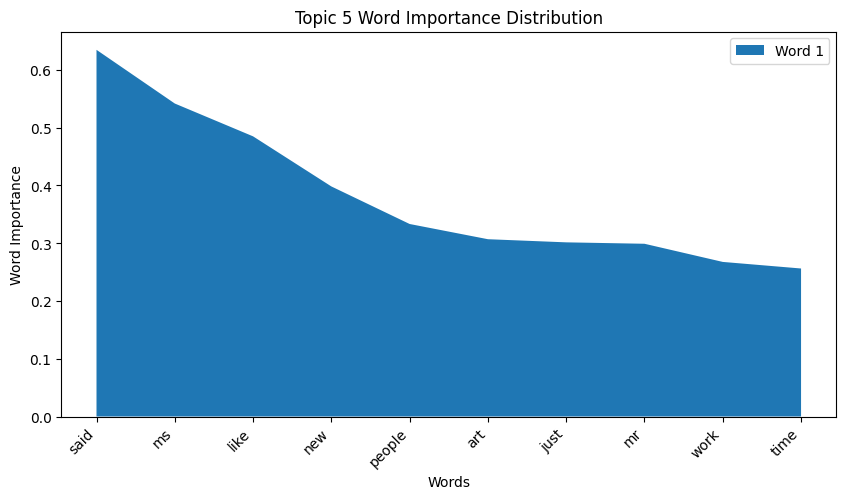

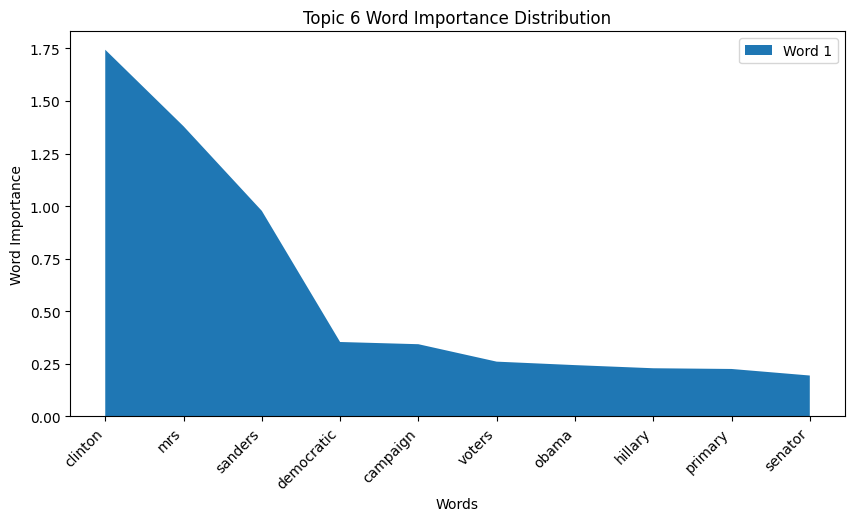

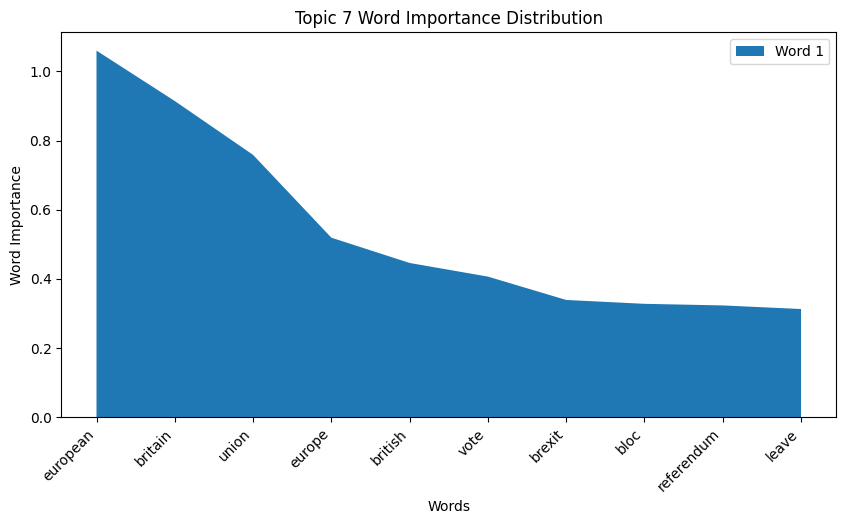

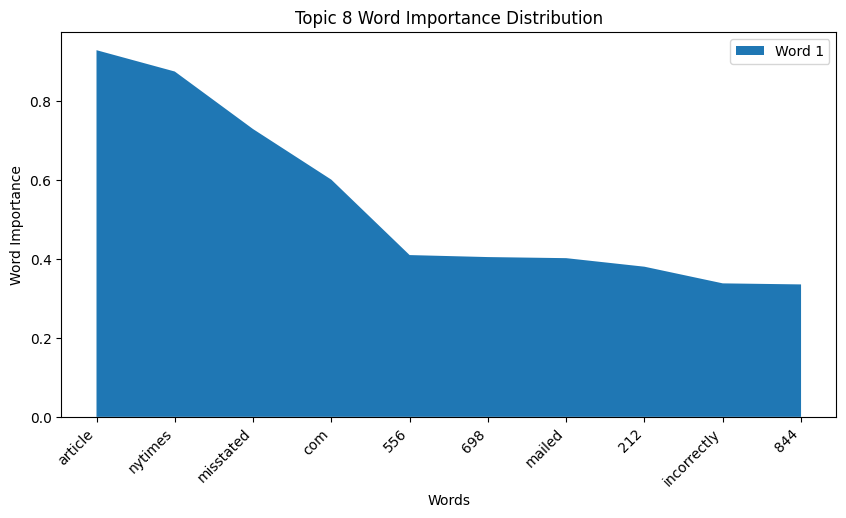

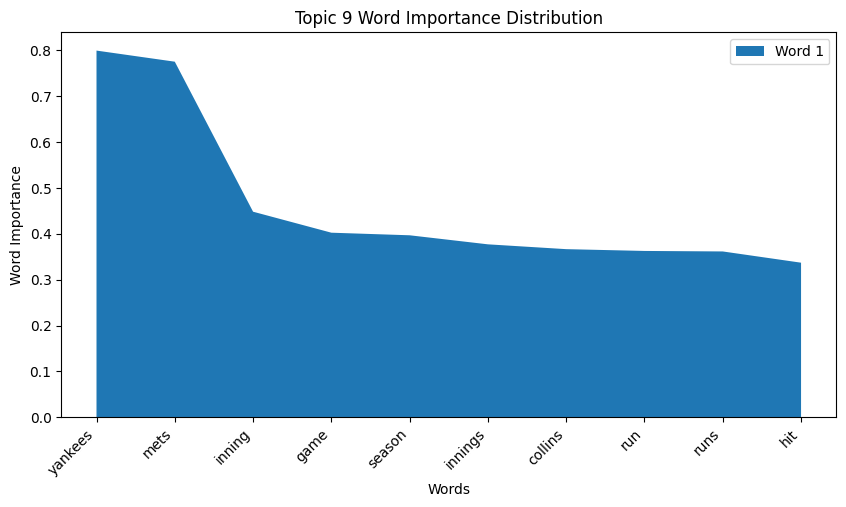

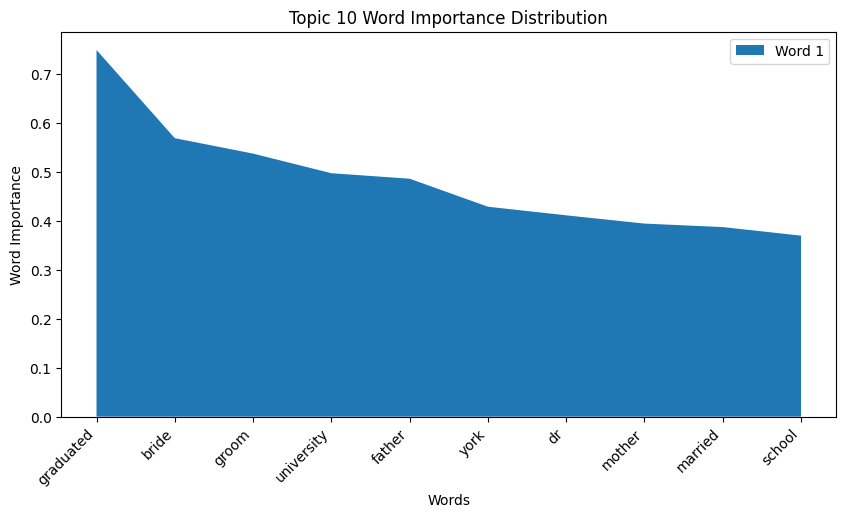

In [ ]:
def generate_stacked_area_chart_for_topic(topic_idx, model, feature_names, n_top_words):
    topic_words = [feature_names[i] for i in model.components_[topic_idx].argsort()[:-n_top_words - 1:-1]]
    topic_word_scores = [model.components_[topic_idx][i] for i in model.components_[topic_idx].argsort()[:-n_top_words - 1:-1]]

    plt.figure(figsize=(10, 5))
    plt.stackplot(topic_words, topic_word_scores, labels=[f"Word {i+1}" for i in range(len(topic_words))])
    plt.title(f"Topic {topic_idx + 1} Word Importance Distribution")
    plt.xlabel("Words")
    plt.ylabel("Word Importance")
    plt.legend(loc='upper right')
    plt.xticks(rotation=45, ha='right')
    plt.show()


n_top_words = 10

for topic_idx in range(num_topics):
    generate_stacked_area_chart_for_topic(topic_idx, nmf_model, feature_names, n_top_words)
